In [19]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import ipywidgets as widgets

IMAGE_FOLDER_PATH = '../Data/KFashion/Samp_KFashion_Image/'
LABEL_FOLDER_PATH = "../Data/KFashion/Samp_KFashion_Label/"
CAPTION_FOLDER_PATH = "../Data/Seed/Caption/"
ADD_INFO_FOLDER_PATH = "../Data/Seed/Add_Info/"
INSTRUCTION_FOLDER_PATH = "../Data/Seed/Seed_Label/"

IMAGE_FILE_LIST = sorted(os.listdir("../Data/KFashion/Samp_KFashion_Image/"))[:5]
LABEL_FILE_LIST = sorted(os.listdir("../Data/KFashion/Samp_KFashion_Label/"))[:5]

print('Image File : ', IMAGE_FILE_LIST)
print('Label_File : ', LABEL_FILE_LIST)

Image File :  ['1.jpg', '1013.jpg', '1014.jpg', '1031248.jpg', '1033.jpg']
Label_File :  ['1.json', '1013.json', '1014.json', '1031248.json', '1033.json']


- 라벨링 데이터에서 옷 세부 사항 정보만 추출 -> 캡션 데이터

In [41]:
def load_label(label_path):
    with open(label_path, 'r', encoding='utf-8') as file:
        label = json.load(file)
    return label

def extract_details(label):
    style = label['데이터셋 정보']['데이터셋 상세설명']['라벨링']['스타일']
    outer = label['데이터셋 정보']['데이터셋 상세설명']['라벨링']['아우터']
    pants = label['데이터셋 정보']['데이터셋 상세설명']['라벨링']['하의']
    dress = label['데이터셋 정보']['데이터셋 상세설명']['라벨링']['원피스']
    top = label['데이터셋 정보']['데이터셋 상세설명']['라벨링']['상의']
    label_data_detail = [style, outer, pants, dress, top]
    return label_data_detail

def create_deatil_caption(label_data_detail):
    caption = []
    if '스타일' in label_data_detail[0][0]:
        caption.append(f"스타일 : {label_data_detail[0][0]['스타일']},")
    if '서브스타일' in label_data_detail[0][0]:
        caption.append(f"서브스타일 : {label_data_detail[0][0]['서브스타일']},")
    outer_detail = label_data_detail[1]
    pant_detail = label_data_detail[2]
    dress_detail = label_data_detail[3]
    top_detail = label_data_detail[4]
    if outer_detail is not [{}]:
        caption.append(f"아우터 : {outer_detail[0]},")
    if pant_detail is not [{}]:
        caption.append(f"하의 : {pant_detail[0]},")
    if dress_detail is not [{}]:
        caption.append(f"원피스 : {dress_detail[0]},")
    if top_detail is not [{}]:
        caption.append(f"상의 : {top_detail[0]},")
    return " ".join(caption)

def translate_captions(caption_li):
    # Translation dictionary
    translation_dict = {
        "서브스타일": "Substyle",
        "스타일": "Style",
        "아우터": "Outerwear",
        "하의": "Bottom",
        "원피스": "Dress",
        "상의": "Top",
        "소매기장": "Sleeve Length",
        "기장": "Length",
        "색상": "Color",
        "서브색상": "Subcolor",
        "카테고리": "Category",
        "디테일": "Details",
        "소재": "Material",
        "프린트": "Print",
        "핏": "Fit",
        "옷깃": "Collar",
        "스트리트": "Street",
        "모던": "Modern",
        "리조트": "Resort",
        "펑크": "Punk",
        "로맨틱": "Romantic",
        "젠더리스": "Genderless",
        "컨트리": "Country",
        "롱": "Long",
        "미디": "Midi",
        "하프": "Half",
        "발목": "Ankle",
        "베이지": "Beige",
        "스카이블루": "Sky Blue",
        "화이트": "White",
        "그레이": "Gray",
        "블랙": "Black",
        "브라운": "Brown",
        "점퍼": "Jumper",
        "청바지": "Jeans",
        "티셔츠": "T-shirt",
        "드레스": "Dress",
        "재킷": "Jacket",
        "팬츠": "Pants",
        "니트웨어": "Knitwear",
        "스트링": "String",
        "지퍼": "Zipper",
        "플리츠": "Pleats",
        "롤업": "Rolled Up",
        "무지": "Solid",
        "오버사이즈": "Oversized",
        "노멀": "Normal",
        "루즈": "Loose",
        "라운드넥": "Round Neck",
        "브이넥": "V-neck",
        "셔링": "Shirring",
        "데님": "Denim",
        "우븐": "Woven",
        "가죽": "Leather",
        "플로럴": "Floral",
        "니트": "Knit",
        '테일러드칼라': 'Tailored Collar',
        '긴팔': 'Long Sleeve',
        '와이드': 'Wide'
    }

    translated_captions = []
    for caption in caption_li:
        translated_caption = caption
        for kor, eng in translation_dict.items():
            translated_caption = translated_caption.replace(kor, eng)
        translated_captions.append(translated_caption)
    return translated_captions

In [33]:
## 각 이미지 별로 옷 묘사 캡션 추출
caption_li = []
for label_path in LABEL_FILE_LIST:
    label = load_label(LABEL_FOLDER_PATH + label_path)
    label_data_detail = extract_details(label)
    caption = create_deatil_caption(label_data_detail)
    caption_li.append(caption)
caption_li

["스타일 : 스트리트, 아우터 : {'기장': '롱', '색상': '베이지', '카테고리': '점퍼', '디테일': ['스트링', '지퍼'], '소매기장': '긴팔', '프린트': ['무지'], '핏': '오버사이즈'}, 하의 : {'기장': '발목', '색상': '스카이블루', '카테고리': '청바지', '디테일': ['롤업'], '소재': ['데님'], '핏': '노멀'}, 원피스 : {}, 상의 : {'색상': '화이트', '카테고리': '티셔츠', '소매기장': '없음', '소재': ['저지'], '프린트': ['무지'], '넥라인': '라운드넥', '핏': '루즈'},",
 "스타일 : 모던, 아우터 : {}, 하의 : {}, 원피스 : {'기장': '미디', '색상': '그레이', '카테고리': '드레스', '디테일': ['플리츠'], '소매기장': '긴팔', '소재': ['우븐'], '프린트': ['무지'], '넥라인': '라운드넥', '핏': '루즈'}, 상의 : {},",
 "스타일 : 리조트, 아우터 : {}, 하의 : {}, 원피스 : {'기장': '미디', '색상': '그레이', '카테고리': '드레스', '디테일': ['플리츠'], '소매기장': '긴팔', '소재': ['우븐'], '프린트': ['무지'], '넥라인': '라운드넥', '핏': '루즈'}, 상의 : {},",
 "스타일 : 펑크, 서브스타일 : 로맨틱, 아우터 : {'기장': '하프', '색상': '블랙', '카테고리': '재킷', '옷깃': '테일러드칼라', '디테일': ['지퍼', '띠'], '소매기장': '긴팔', '소재': ['가죽'], '프린트': ['무지'], '핏': '루즈'}, 하의 : {}, 원피스 : {'기장': '미디', '색상': '블랙', '서브색상': '화이트', '카테고리': '드레스', '디테일': ['셔링'], '소매기장': '없음', '소재': ['우븐'], '프린트': ['플로럴'], '넥라인': '브이넥', '핏': '루즈'}, 상의 

In [42]:
translated_captions = translate_captions(caption_li)
translated_captions

["Style : Street, Outerwear : {'Length': 'Long', 'Color': 'Beige', 'Category': 'Jumper', 'Details': ['String', 'Zipper'], 'Sleeve Length': 'Long Sleeve', 'Print': ['Solid'], 'Fit': 'Oversized'}, Bottom : {'Length': 'Ankle', 'Color': 'Sky Blue', 'Category': 'Jeans', 'Details': ['Rolled Up'], 'Material': ['Denim'], 'Fit': 'Normal'}, Dress : {}, Top : {'Color': 'White', 'Category': 'T-shirt', 'Sleeve Length': '없음', 'Material': ['저지'], 'Print': ['Solid'], '넥라인': 'Round Neck', 'Fit': 'Loose'},",
 "Style : Modern, Outerwear : {}, Bottom : {}, Dress : {'Length': 'Midi', 'Color': 'Gray', 'Category': 'Dress', 'Details': ['Pleats'], 'Sleeve Length': 'Long Sleeve', 'Material': ['Woven'], 'Print': ['Solid'], '넥라인': 'Round Neck', 'Fit': 'Loose'}, Top : {},",
 "Style : Resort, Outerwear : {}, Bottom : {}, Dress : {'Length': 'Midi', 'Color': 'Gray', 'Category': 'Dress', 'Details': ['Pleats'], 'Sleeve Length': 'Long Sleeve', 'Material': ['Woven'], 'Print': ['Solid'], '넥라인': 'Round Neck', 'Fit': 'Loose

In [ ]:
# ## 각 이미지 번호에 맞는 파일명으로 캡션을 JSON 파일로 저장
# for label_path, caption in zip(LABEL_FILE_LIST, caption_li):
#     # 라벨 경로에서 파일 번호(예: '268') 추출
#     file_number = os.path.basename(label_path).split('.')[0]
#     # 캡션 파일 경로 정의
#     caption_file_path = os.path.join(CAPTION_FOLDER_PATH, f"{file_number}.json")
#     #  캡션을 JSON 파일로 저장
#     with open(caption_file_path, 'w', encoding='utf-8') as file:
#         json.dump({"caption": caption}, file, ensure_ascii=False, indent=4)

- 이미지 확인 & 추가 정보 입력
    - 어울리는 상황 : , 어울리는 계절 : , 패턴 : , 신발 : , 소품 :



In [ ]:
def checking_image_add_info_data(image_path):
    # 이미지 열기 및 표시
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # 추가 정보 입력 받기
    add_info_text = widgets.Text(
        value='',
        placeholder='추가적인 정보를 입력하세요',
        description='정보:',
        disabled=False
    )

    display(add_info_text)

    # 버튼을 눌렀을 때 텍스트를 저장하는 함수
    def on_button_click(b):
        add_info_path = os.path.join(ADD_INFO_FOLDER_PATH, os.path.basename(image_path).split('.')[0] + '.txt')
        pd.Series([add_info_text.value]).to_csv(add_info_path, index=False, header=False)
        print(f"추가 정보가 {add_info_path}에 저장되었습니다.")

    # 버튼 생성 및 display
    button = widgets.Button(description="저장")
    button.on_click(on_button_click)
    display(button)

In [ ]:
## 추가 정보 예시 리스트

# 어울리는 상황 예시(리스트에서 사용)
일상_캐주얼_외출 = ["친구와의 브런치","가벼운 산책","쇼핑 데이","카페에서 독서",
             "도서관 방문","공원 피크닉","주말 영화관 나들이","반려동물 산책",
             "도심 속 자전거 타기","마트 장보기","카페 방문", "친구들이랑 놀기"]
비즈니스_포멀 = ["직장 면접","회사 출근","클라이언트 미팅","공식 발표회",
           "업무 워크숍", "사내 프레젠테이션","네트워킹 행사","고급 레스토랑 점심"]
파티_특별한날 = ["결혼식 하객룩","생일 파티","연말 파티","주말 저녁 술자리",
           "칵테일 파티","축하 이벤트","미술관 개관식"]
여행_액티비티 = ["해변 휴가","캠핑","해외여행 도시 투어","산악 하이킹","봄꽃 축제",
           "계곡 피크닉","온천 여행","비행기 기내 복장","휴양지"]
계절별_상황 = ["봄 벚꽃놀이","여름 해변가","가을 단풍 구경","겨울 크리스마스 마켓",
          "장마철 외출","무더운 여름 낮","쌀쌀한 가을 저녁","한파 속 출근길"]
데이트_로맨틱 = ["저녁 데이트","야경이 멋진 레스토랑","놀이공원 데이트",
           "감성 카페 데이트","겨울 아이스링크 데이트","드라이브 데이트",
           "별빛이 보이는 루프탑","피크닉 데이트"]
스포츠_활동 = ["동네 산책", "요가 수업","헬스장 운동","등산","자전거 타기","러닝",
          "필라테스 수업","배드민턴 경기"]

# 어울리는 계절 예시(리스트에서 사용)
계절 = ['봄','여름','가을','겨울']

# 패턴 예시(리스트에서 사용)
패턴 = ['무지','스프라이트','격자','도트','꽃','호피','얼룩말','헤링본','지그재그'
      '사각형','삼각형','원','체크','추상적','타이다이','쉐브론','아가일','레이스',
      '물결','다마스크','셔링','트위드','캐릭터 그림','영어 프린팅','한글 프린팅','밀리터리','마블 나염','투칼러']
#'상의-반복되는 사각형','하의-물결','원피스-무지','아우터-꽃']

# 신발 예시(각자 추가)
신발 = ['흰색 운동화','검정색 운동화',
      '검정색 단화','갈색 단화','베이지색 단화',
      '검정색 블로퍼','흰색 블로퍼'
      '갈색 워커', '검정색 워커'
      '검정색 구두','베이지색 구두', '갈색 구두','분홍색 구두'
      '흰색 하이힐','검정색 하이힐',
      '검정색 로퍼', '갈색 로퍼',
      '검정색 부츠'
      '베이지색 플랫슈즈',
      '흰색 슬리퍼','흰색 샌달',' 검정색 샌달','흰색 단화', '은색 단화', '운동화','첼시 부츠','갈색 앵클 부츠','갈색 부츠','아이보리 앵클 부츠',
      '러닝화','은색 구두']

# 소품 예시(각자 추가)
소품 = ['토트백','백팩','에코백','핸드백','라틴백','종이백','볼캡',
      '핸드폰','꽃','파우치','없음']

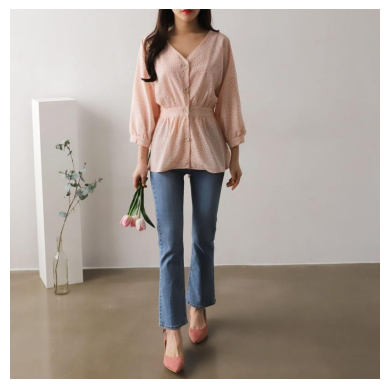

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

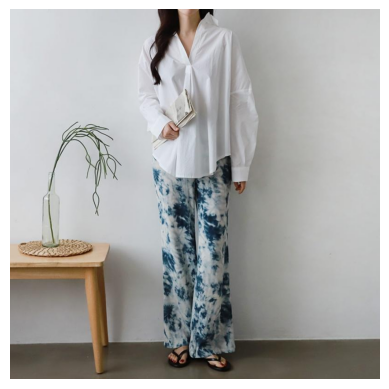

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

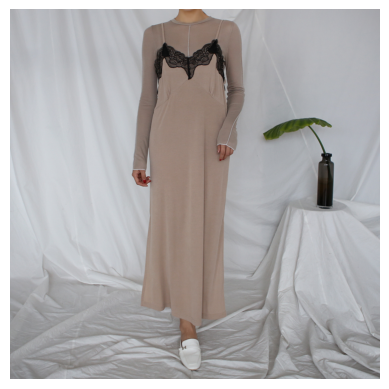

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

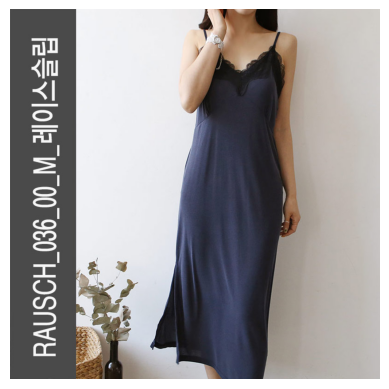

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

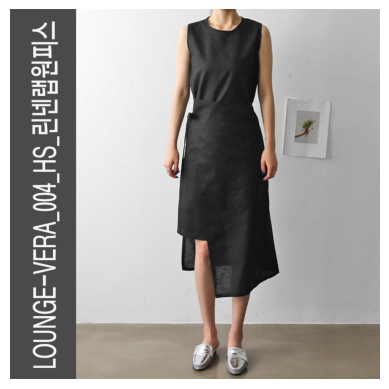

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

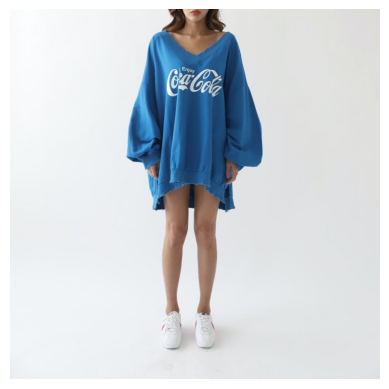

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

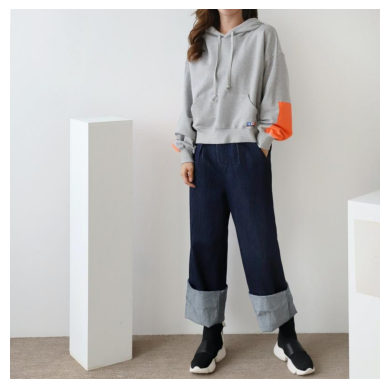

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

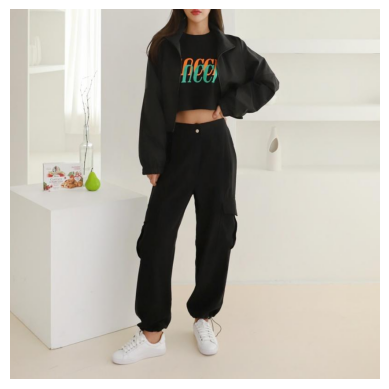

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

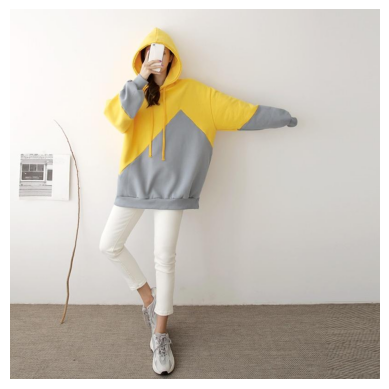

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

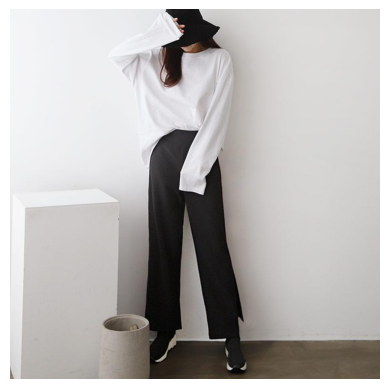

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

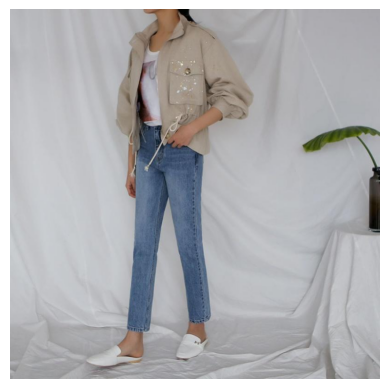

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

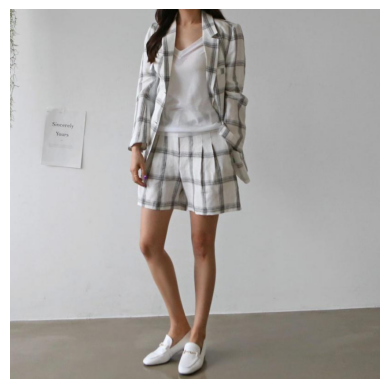

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

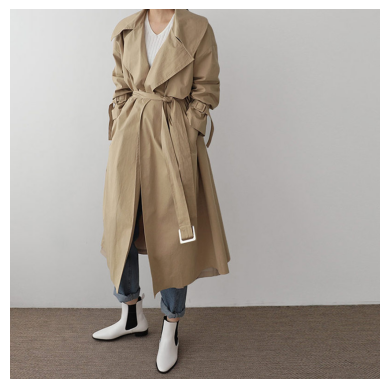

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

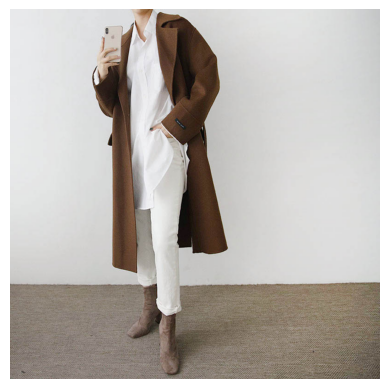

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

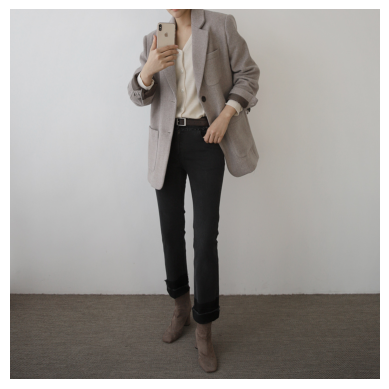

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

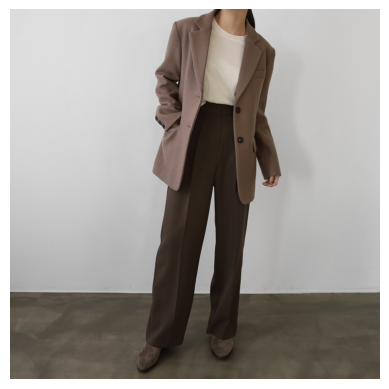

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

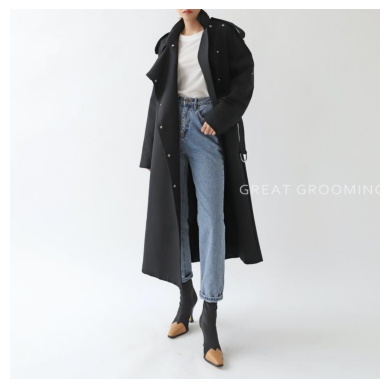

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

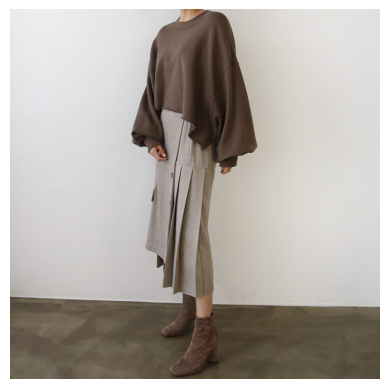

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

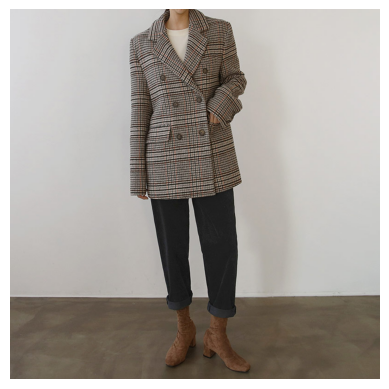

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

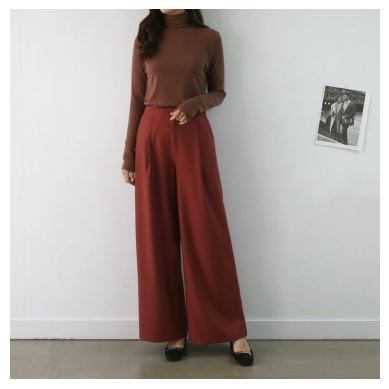

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

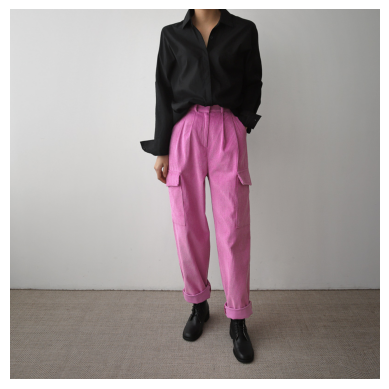

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

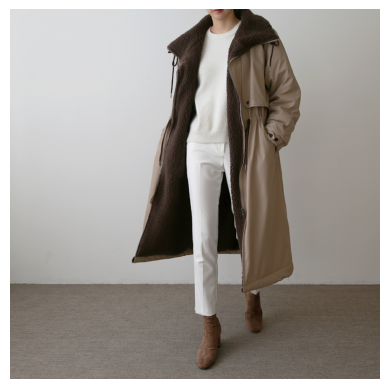

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

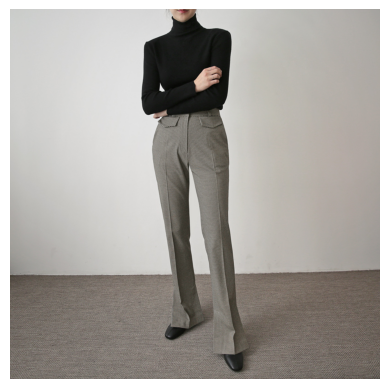

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

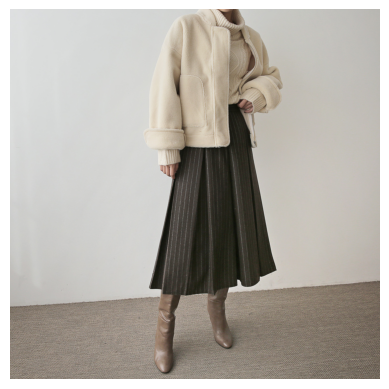

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

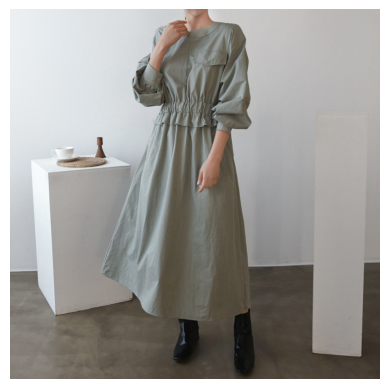

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

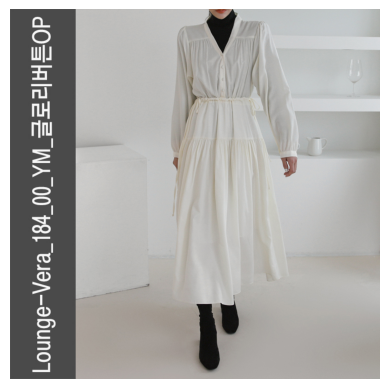

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

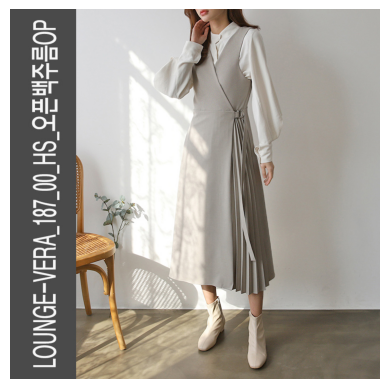

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

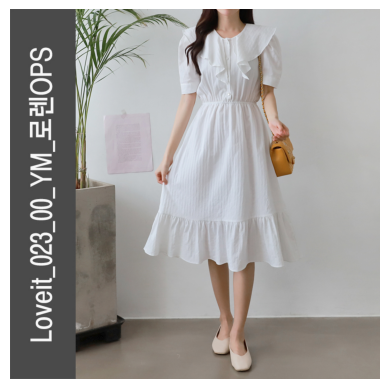

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

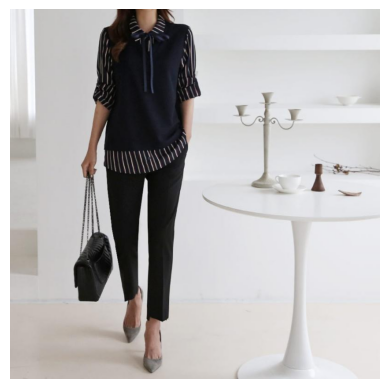

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

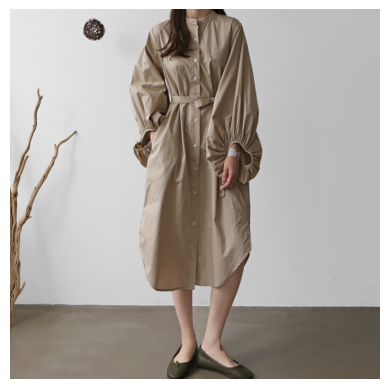

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

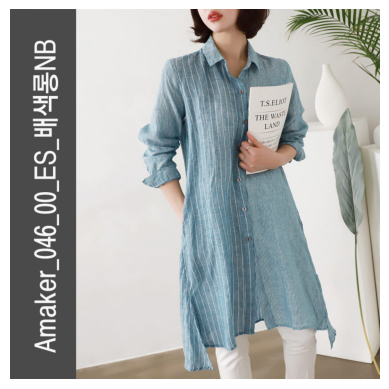

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

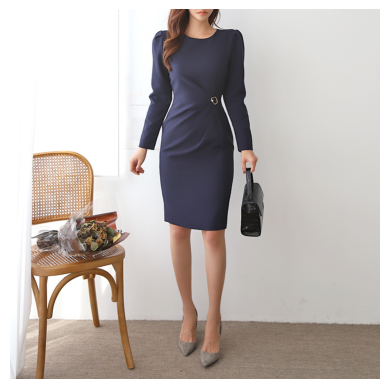

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

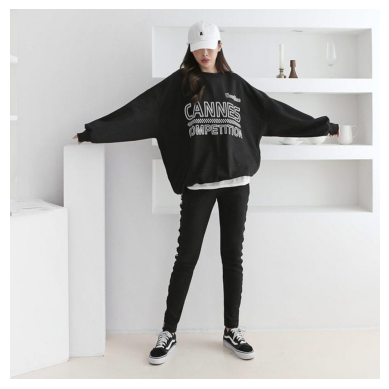

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

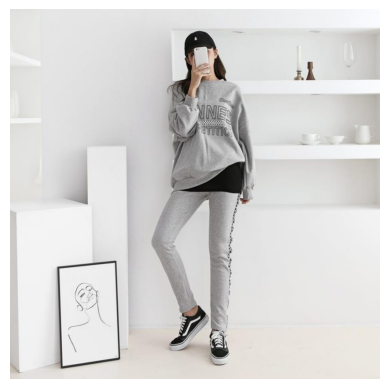

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

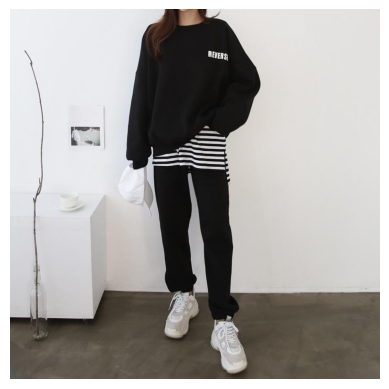

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

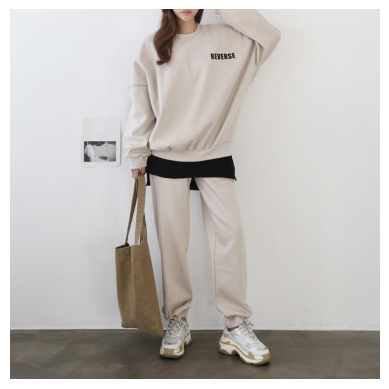

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

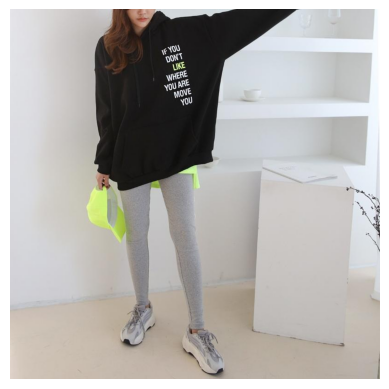

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

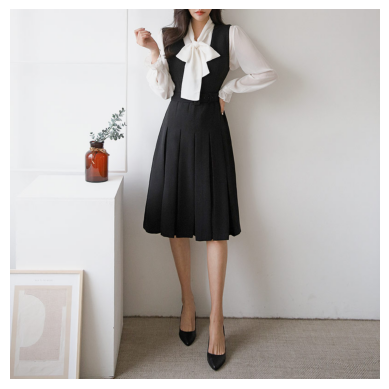

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

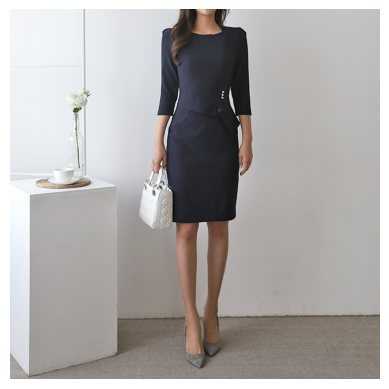

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

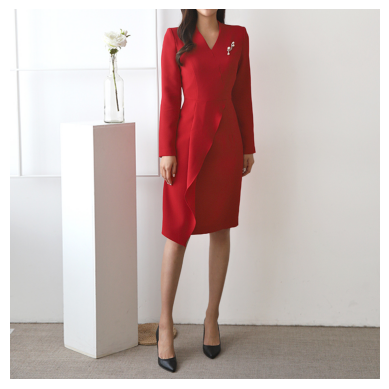

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

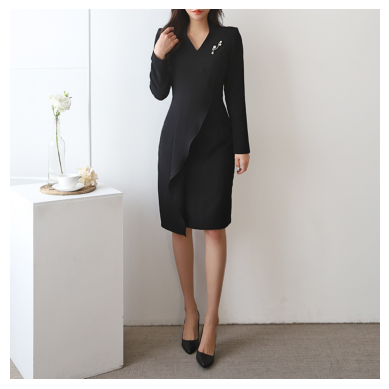

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

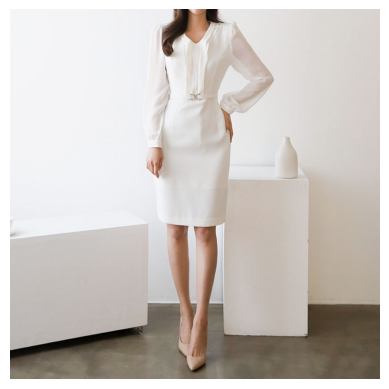

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

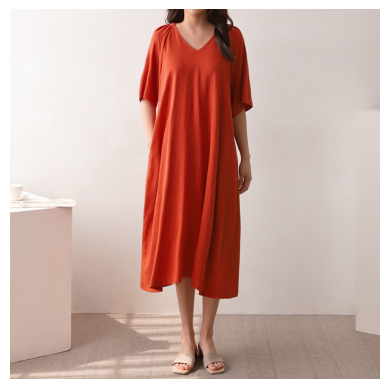

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

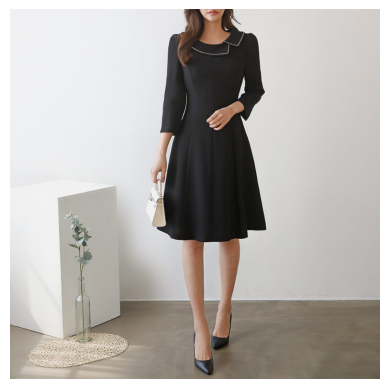

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

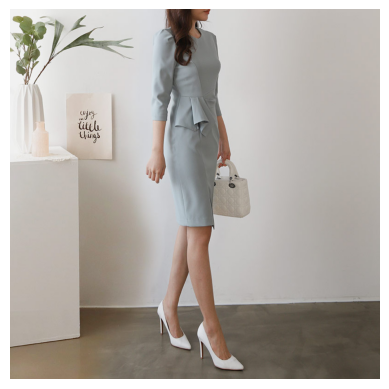

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

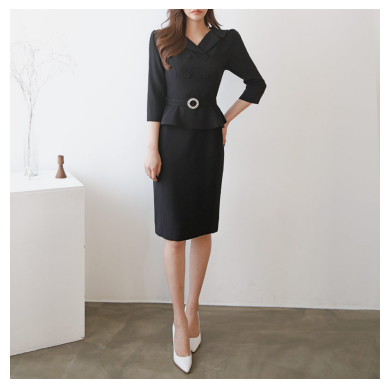

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

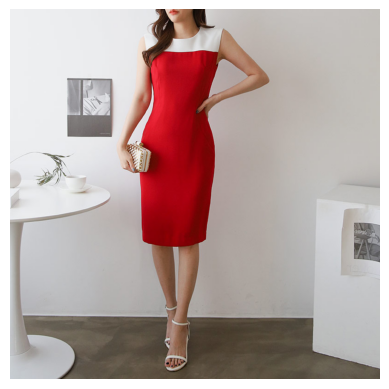

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

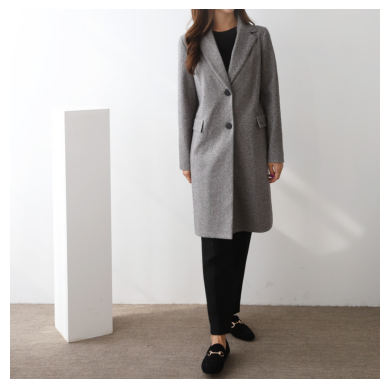

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

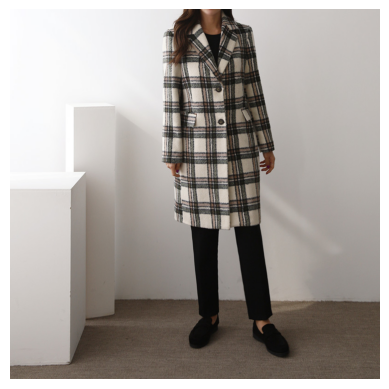

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

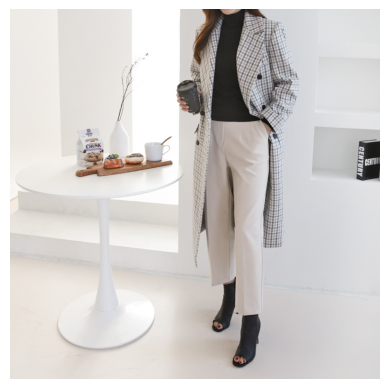

Text(value='', description='정보:', placeholder='추가적인 정보를 입력하세요')

Button(description='저장', style=ButtonStyle())

추가 정보가 /content/drive/MyDrive/[빅컴]프로젝트/vlm-main/Data/KFashion_Image/Add_Info_Data/15681.txt에 저장되었습니다.
추가 정보가 /content/drive/MyDrive/[빅컴]프로젝트/vlm-main/Data/KFashion_Image/Add_Info_Data/15711.txt에 저장되었습니다.
추가 정보가 /content/drive/MyDrive/[빅컴]프로젝트/vlm-main/Data/KFashion_Image/Add_Info_Data/1572.txt에 저장되었습니다.
추가 정보가 /content/drive/MyDrive/[빅컴]프로젝트/vlm-main/Data/KFashion_Image/Add_Info_Data/1577.txt에 저장되었습니다.
추가 정보가 /content/drive/MyDrive/[빅컴]프로젝트/vlm-main/Data/KFashion_Image/Add_Info_Data/1599.txt에 저장되었습니다.
추가 정보가 /content/drive/MyDrive/[빅컴]프로젝트/vlm-main/Data/KFashion_Image/Add_Info_Data/161104.txt에 저장되었습니다.
추가 정보가 /content/drive/MyDrive/[빅컴]프로젝트/vlm-main/Data/KFashion_Image/Add_Info_Data/161119.txt에 저장되었습니다.
추가 정보가 /content/drive/MyDrive/[빅컴]프로젝트/vlm-main/Data/KFashion_Image/Add_Info_Data/161104.txt에 저장되었습니다.
추가 정보가 /content/drive/MyDrive/[빅컴]프로젝트/vlm-main/Data/KFashion_Image/Add_Info_Data/1599.txt에 저장되었습니다.
추가

In [ ]:
for i in range(len(IMAGE_FILE_LIST)):
    image_path = IMAGE_FOLDER_PATH + IMAGE_FILE_LIST[i]
    checking_image_add_info_data(image_path)

- Instruction Dataset 생성
    - objective : stable diffusion이 자세하게 묘사된 텍스트를 기반으로 옷 이미지를 잘 생성해야 함
    - input : 옷 묘사(라벨데이터)
    - add info : 옷 추가 묘사(직접 추가한 데이터)
    - output : 옷 이미지(원천데이터)
    - => task_description : input과 add info 기반으로 옷을 생성해줘

In [ ]:
Instruction_Dataset_Format = {"Prompt":
                                {"persona":"당신은 한국 20-30대 여성을 타겟으로 하는 패션 디자이너입니다.",
                                 "task_description": "Input과 Add_Info를 기반으로 여성이 옷을 입은 모습을 생성해주세요.",
                                 "constraint": "얼굴을 제외하고 여성의 전신이 나오도록 옷 입은 모습 이미지를 생성해주세요, 그림 형식이 아니라 사진 형식이여야 됩니다."},
                            "Input": "",
                            "Add_Info": "",
                            "Output": ""}

In [ ]:
def generate_instruction_dataset(Instruction_Dataset_Format,LABEL_FILE_LIST,file_index):
    # 라벨링데이터 로드
    with open(CAPTION_FOLDER_PATH + LABEL_FILE_LIST[file_index], 'r', encoding='utf-8') as file:
        labeling = json.load(file)
    # 원천데이터 이미지 파일명 로드
    image = IMAGE_FILE_LIST[file_index]
    # 추가 정보 로드
    add_info = pd.read_csv(ADD_INFO_FOLDER_PATH + os.path.basename(LABEL_FILE_LIST[file_index]).split('.')[0] + '.txt', header=None)[0][0]
    # Instruction_Dataset_Format 업데이트
    Instruction_Dataset_Format['Input'] = labeling
    Instruction_Dataset_Format['Add_Info'] = add_info
    Instruction_Dataset_Format['Output'] = image
    # Instruction_Dataset JSON 파일로 저장
    with open(INSTRUCTION_FOLDER_PATH + os.path.basename(LABEL_FILE_LIST[file_index]).split('.')[0] + '.json', 'w', encoding='utf-8') as file:
       json.dump(Instruction_Dataset_Format, file, ensure_ascii=False, indent=4)
    print("Instruction_Dataset : ", Instruction_Dataset_Format)
    print('-'*50)

In [ ]:
for file_index in range(len(LABEL_FILE_LIST)):
    generate_instruction_dataset(Instruction_Dataset_Format, LABEL_FILE_LIST, file_index)

Instruction_Dataset :  {'Prompt': {'persona': '당신은 한국 20-30대 여성을 타겟으로 하는 패션 디자이너입니다.', 'task_description': 'Input과 Add_Info를 기반으로 여성이 옷을 입은 모습을 생성해주세요.', 'constraint': '얼굴을 제외하고 여성의 전신이 나오도록 옷 입은 모습 이미지를 생성해주세요, 그림 형식이 아니라 사진 형식이여야 됩니다.'}, 'Input': {'caption': "스타일 : 레트로 서브스타일 : 스트리트 아우터 : {}, 하의 : {'기장': '발목', '색상': '블루', '카테고리': '청바지', '소재': ['데님'], '핏': '노멀'}, 원피스 : {}, 상의 : {'기장': '롱', '색상': '핑크', '서브색상': '브라운', '카테고리': '블라우스', '디테일': ['플레어'], '소매기장': '긴팔', '소재': ['시폰'], '프린트': ['도트'], '넥라인': '브이넥', '핏': '노멀'},"}, 'Add_Info': '어울리는 상황: 데이트_로맨틱, 어울리는 계절:봄,가을, 패턴: 상의- 무지, 하의- 무지 , 신발: 분홍색 구두  ', 'Output': '15681.jpg'}
--------------------------------------------------
Instruction_Dataset :  {'Prompt': {'persona': '당신은 한국 20-30대 여성을 타겟으로 하는 패션 디자이너입니다.', 'task_description': 'Input과 Add_Info를 기반으로 여성이 옷을 입은 모습을 생성해주세요.', 'constraint': '얼굴을 제외하고 여성의 전신이 나오도록 옷 입은 모습 이미지를 생성해주세요, 그림 형식이 아니라 사진 형식이여야 됩니다.'}, 'Input': {'caption': "스타일 : 히피 아우터 : {}, 하의 : {'기장': '맥시', '색상': '화이트', '서브색상': '

In [ ]:
len(LABEL_FILE_LIST)

50